# Scripts lecture des CSV

In [81]:
import pandas as pd
import os

In [82]:
# Définition du chemin des CSV
export_path = "exports"
inference_path = os.path.join(export_path, "inference")

# Charger tous les CSV d'entraînement
train_files = [file for file in os.listdir(export_path) if file.endswith(".csv")]
train_dfs = {file: pd.read_csv(os.path.join(export_path, file)) for file in os.listdir(export_path) if file.endswith(".csv")}

# Charger tous les CSV d'inférence
inference_files = [file for file in os.listdir(inference_path) if file.endswith(".csv")]
inference_dfs = {file: pd.read_csv(os.path.join(inference_path, file)) for file in os.listdir(inference_path) if file.endswith(".csv")}

# Afficher un aperçu d'un fichier
# print(train_dfs[list(train_dfs.keys())[0]].head())

print("Fichiers d'entraînement trouvés :")
print(train_files)
print(' ')
print("Fichiers d'inférence trouvés :")
print(inference_files)


Fichiers d'entraînement trouvés :
['metrics_Transformer_GPU_M2 Pro.csv', 'metrics_CNN_GPU_M2 Pro.csv', 'metrics_MLP_CPU_M4.csv', 'metrics_RNN_GPU_M4.csv', 'metrics_MLP_GPU_M2 Pro.csv', 'metrics_RNN_GPU_M1 Pro.csv', 'metrics_Transformer_GPU_M1 Pro.csv', 'metrics_CNN_GPU_M1 Pro.csv', 'metrics_CNN_CPU_M4.csv', 'metrics_RNN_GPU_M2 Pro.csv', 'metrics_MLP_GPU_M1 Pro.csv', 'metrics_Transformer_GPU_M4.csv', 'metrics_CNN_CPU_M1 Pro.csv', 'metrics_CNN_GPU_M4.csv', 'metrics_Transformer_CPU_M1 Pro.csv', 'metrics_MLP_CPU_M1 Pro.csv', 'metrics_Transformer_CPU_M4.csv', 'metrics_RNN_CPU_M2 Pro.csv', 'metrics_CNN_CPU_M2 Pro.csv', 'metrics_Transformer_CPU_M2 Pro.csv', 'metrics_RNN_CPU_M1 Pro.csv', 'metrics_MLP_CPU_M2 Pro.csv', 'metrics_MLP_GPU_M4.csv', 'metrics_RNN_CPU_M4.csv']
 
Fichiers d'inférence trouvés :
['inference_rnn_CPU_M1 Pro.csv', 'inference_mlp_CPU_M2 Pro.csv', 'inference_rnn_GPU_M4.csv', 'inference_mlp_CPU_M4.csv', 'inference_cnn_CPU_M2 Pro.csv', 'inference_transformers_CPU_M4.csv', 'infer

In [83]:
for model, df in inference_dfs.items():
    print(f"Modèle {model}: Temps d'inférence moyen = {df['inference_time_ms'].mean():.4f}")


Modèle inference_rnn_CPU_M1 Pro.csv: Temps d'inférence moyen = 120.2130
Modèle inference_mlp_CPU_M2 Pro.csv: Temps d'inférence moyen = 157.0885
Modèle inference_rnn_GPU_M4.csv: Temps d'inférence moyen = 218.7119
Modèle inference_mlp_CPU_M4.csv: Temps d'inférence moyen = 118.6585
Modèle inference_cnn_CPU_M2 Pro.csv: Temps d'inférence moyen = 1845.1979
Modèle inference_transformers_CPU_M4.csv: Temps d'inférence moyen = 63.9590
Modèle inference_transformers_CPU_M2 Pro.csv: Temps d'inférence moyen = 107.2063
Modèle inference_mlp_CPU_M1 Pro.csv: Temps d'inférence moyen = 202.3255
Modèle inference_rnn_CPU_M2 Pro.csv: Temps d'inférence moyen = 116.9527
Modèle inference_cnn_CPU_M4.csv: Temps d'inférence moyen = 2081.0115
Modèle inference_transformers_CPU_M1 Pro.csv: Temps d'inférence moyen = 112.0706
Modèle inference_cnn_CPU_M1 Pro.csv: Temps d'inférence moyen = 3163.8273
Modèle inference_rnn_GPU_M2 Pro.csv: Temps d'inférence moyen = 323.2066
Modèle inference_mlp_GPU_M1 Pro.csv: Temps d'infére

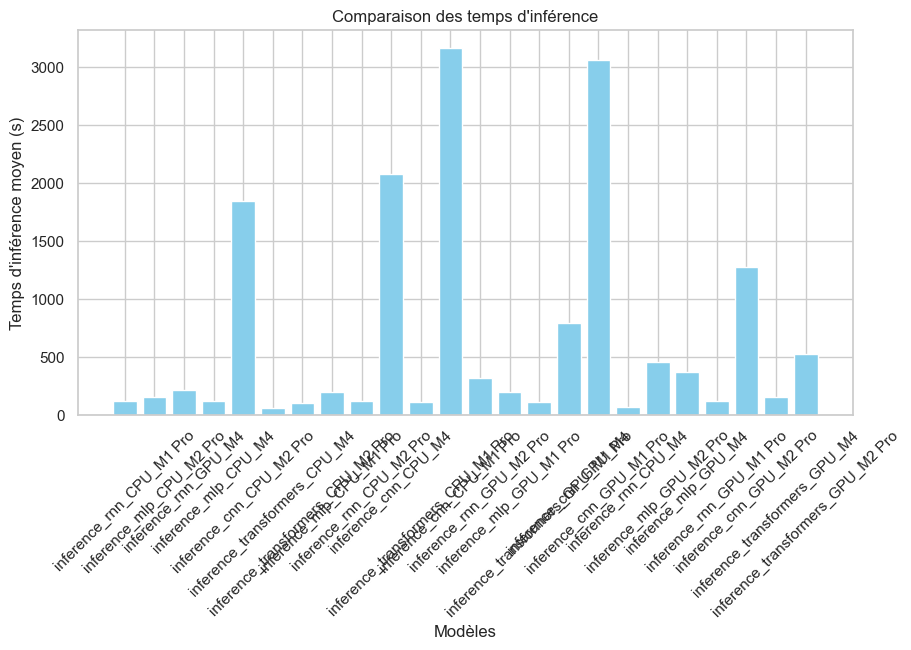

In [84]:
import matplotlib.pyplot as plt

model_names = []
mean_times = []

for model, df in inference_dfs.items():
    model_names.append(model.replace(".csv", ""))
    mean_times.append(df["inference_time_ms"].mean())

plt.figure(figsize=(10, 5))
plt.bar(model_names, mean_times, color="skyblue")
plt.xlabel("Modèles")
plt.ylabel("Temps d'inférence moyen (s)")
plt.title("Comparaison des temps d'inférence")
plt.xticks(rotation=45)
plt.show()


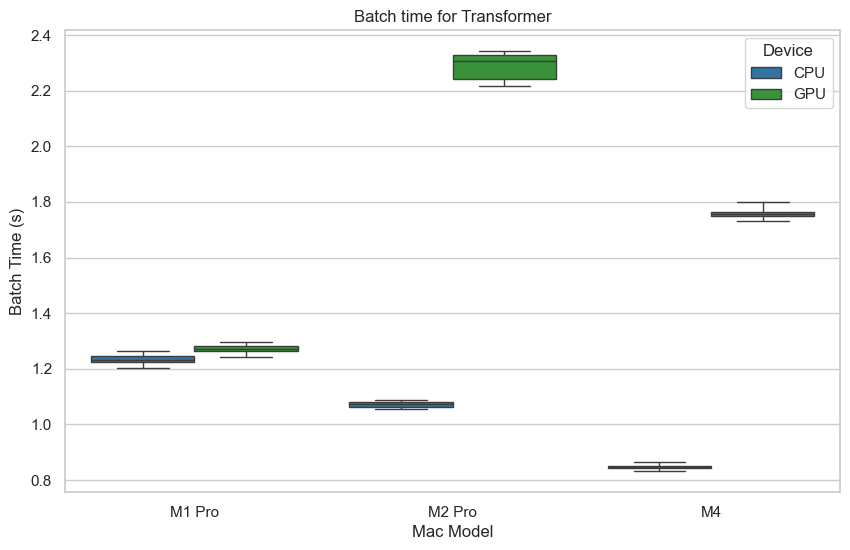

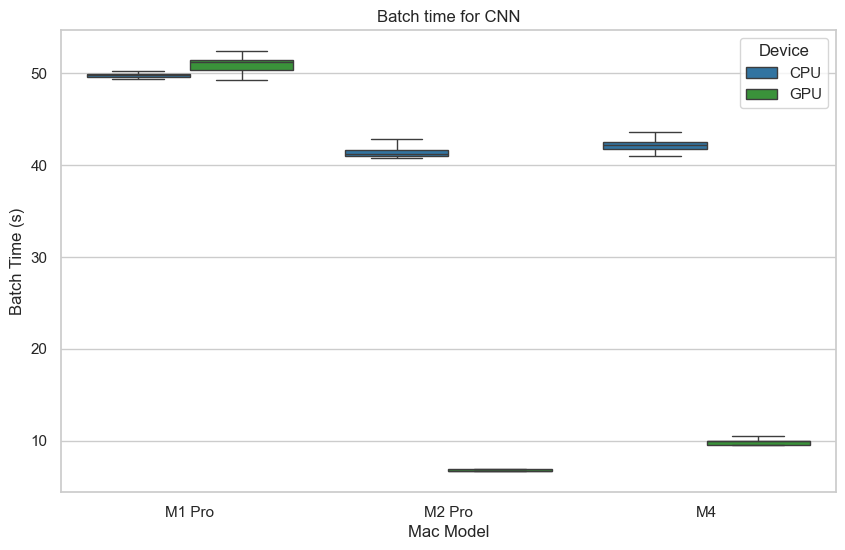

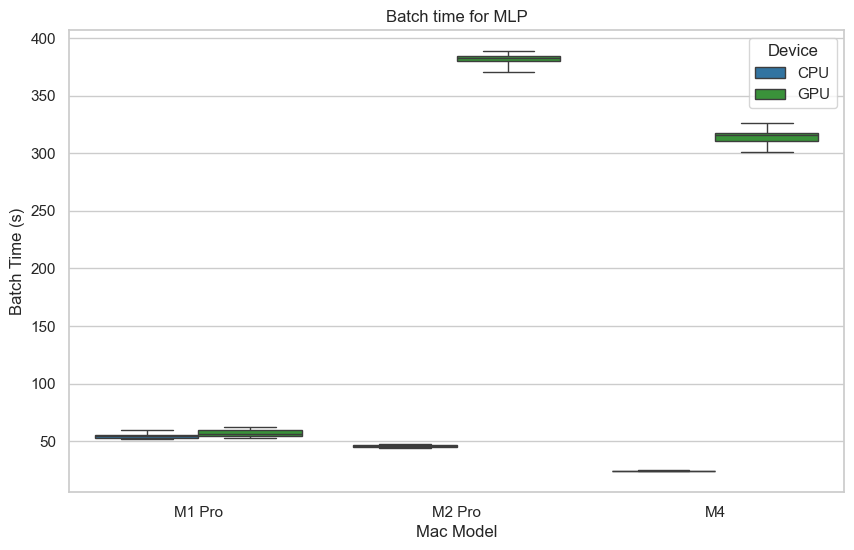

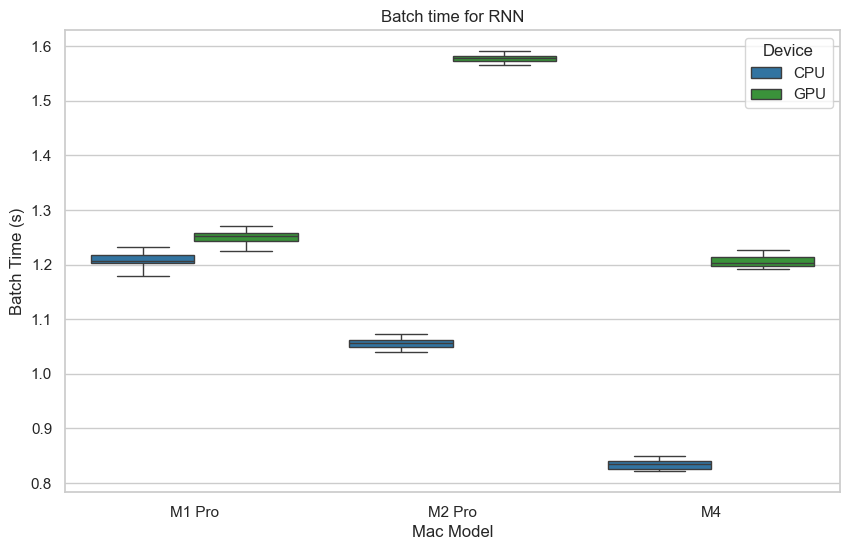

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# Configuration générale des graphiques
sns.set(style="whitegrid")

# Définition d'une palette de couleurs pour différencier les Mac
palette_colors = {"M1 Pro": "#920c29", "M2 Pro": "#fd7e27", "M4": "#f48cf1"}
# Définition de la palette pour les types d'accélération
palette_device = {"CPU": "#1f77b4", "GPU": "#2ca02c"}
palette_ai = {"RNN": "#ff7f0e", "CNN": "#d62728", "Transformer": "#9467bd", "MLP": "#8c564b"}
palette_ai_device = {"CNN (CPU)": "#1f77b4", "CNN (GPU)": "#2ca02c", "RNN (CPU)": "#ff7f0e", "RNN (GPU)": "#d62728", "Transformer (CPU)": "#9467bd", "Transformer (GPU)": "#8c564b", "MLP (CPU)": "#e377c2", "MLP (GPU)": "#7f7f7f"}

# Charger les fichiers CSV
files = glob.glob("exports/**/*.csv", recursive=True)

def remove_outliers2(df, column, k=1.5):
    # Copie du DataFrame pour éviter de modifier l'original
    df_clean = df.copy()
    
    # Calcul des quartiles et de l'IQR pour chaque groupe
    groups = df_clean.groupby(['mac_model', 'device'])
    
    # Liste pour stocker les indices à conserver
    indices_to_keep = []
    
    for name, group in groups:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définition des limites
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Sélection des indices valides
        valid_indices = group[
            (group[column] >= lower_bound) & 
            (group[column] <= upper_bound)
        ].index
        
        indices_to_keep.extend(valid_indices)
    
    # Retour du DataFrame filtré
    return df_clean.loc[indices_to_keep]

dataframes = []
for file in files:
    df = pd.read_csv(file)
    df["source_file"] = file  # Ajouter la source pour identifier les fichiers

    filename = os.path.basename(file).replace(".csv", "")
    parts = filename.split("_")

    # Détection du type de test (inférence ou entraînement)
    if "inference_" in filename:
        df["test_type"] = "inference"
        df.rename(columns={"inference_time_ms": "batch_time"}, inplace=True)
    elif "metrics_" in filename:
        df["test_type"] = "training"
        df.dropna(subset=["batch_time", "power_consumption", "loss"], inplace=True)
        df.sort_values(by=["epoch"], inplace=True)

    # Extraire le modèle de Mac, le type de device et le modèle d'IA depuis le nom du fichier
    mac_model = parts[-1]
    device = parts[2]
    ai_model = parts[1]

    df["mac_model"] = mac_model
    df["device"] = device
    df["ai_model"] = ai_model

    dataframes.append(df)

df_all = pd.concat(dataframes, ignore_index=True)
df_all.drop(columns=["temperature"], inplace=True)

# Filtrer les données pour l'entraînement
df_training = df_all[df_all["test_type"] == "training"]

# Affichage des graphiques pour chaque modèle d'IA
ai_models = df_training["ai_model"].unique()  # Liste des modèles d'IA uniques

for ai in ai_models:
    # Filtrer les données par modèle d'IA
    df_ai = df_training[df_training["ai_model"] == ai]
    
    # Supprimer les outliers
    df_ai_filtered = remove_outliers2(df_ai, "batch_time")
    # df_ai_filtered = df_ai_filtered[df_ai_filtered["batch_time"] < 300]
    df_ai_filtered.dropna(subset=["mac_model", "batch_time", "device"], inplace=True)
    
    
    
    # Création du boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_ai_filtered, x="mac_model", y="batch_time", 
                hue="device", palette=palette_device, whis=3)
    plt.title(f"Batch time for {ai}")
    plt.xlabel("Mac Model")
    plt.ylabel("Batch Time (s)")
    plt.legend(title="Device")
    plt.show()

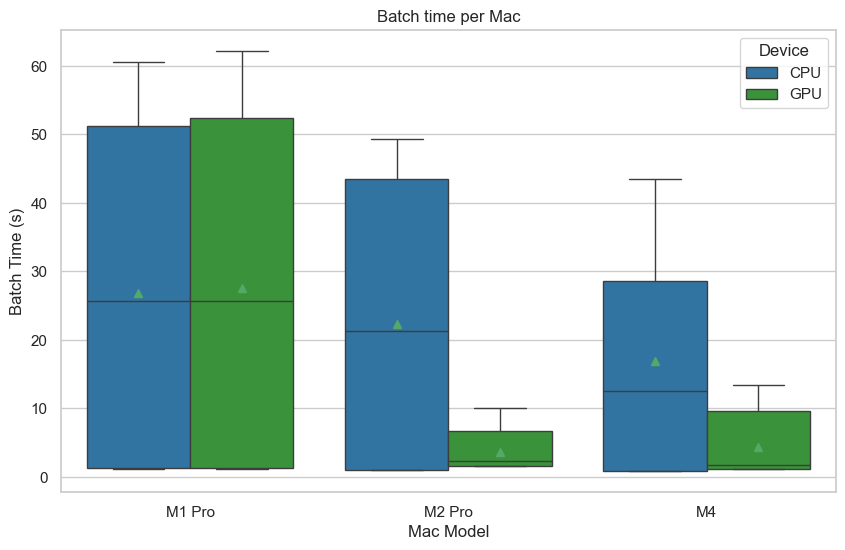

In [101]:
# Comparaison du temps de batch pour l'entraînement
plt.figure(figsize=(10, 6))
df_training = df_all[df_all["test_type"] == "training"]
# Appliquer cette fonction pour supprimer les outliers dans la colonne "batch_time"
df_training_filtered = remove_outliers2(df_training, "batch_time")
# supprimer les valeurs >300
df_training_filtered = df_training_filtered[df_training_filtered["batch_time"] < 300]
df_training_filtered.dropna(subset=["mac_model", "batch_time", "device"], inplace=True)
sns.boxplot(data=df_training_filtered, x="mac_model", y="batch_time", hue="device", palette=palette_device, showmeans=True)
plt.title("Batch time per Mac")
plt.xlabel("Mac Model")
plt.ylabel("Batch Time (s)")
plt.legend(title="Device")
plt.show()

In [87]:
# Calcul des moyennes du batch_time par Mac
batch_time_means = df_training_filtered.groupby("mac_model")["batch_time"].mean()
print("Moyenne du temps de batch par Mac :")
print(batch_time_means)


# Comparaison des ratios entre chaque Mac
macs = batch_time_means.index
ratios = {}

for i in range(len(macs)):
    for j in range(i + 1, len(macs)):
        mac1, mac2 = macs[i], macs[j]
        ratio = batch_time_means[mac1] / batch_time_means[mac2]
        ratios[f"{mac1} vs {mac2}"] = ratio
        ratios[f"{mac2} vs {mac1}"] = 1 / ratio

print("\nComparaison des ratios de batch time entre chaque Mac :")
for k, v in ratios.items():
    print(f"{k}: {v:.2f}x")


Moyenne du temps de batch par Mac :
mac_model
M1 Pro    27.183182
M2 Pro    14.349901
M4        11.559980
Name: batch_time, dtype: float64

Comparaison des ratios de batch time entre chaque Mac :
M1 Pro vs M2 Pro: 1.89x
M2 Pro vs M1 Pro: 0.53x
M1 Pro vs M4: 2.35x
M4 vs M1 Pro: 0.43x
M2 Pro vs M4: 1.24x
M4 vs M2 Pro: 0.81x


/var/folders/f2/jkvc9s6x039dm5cg4ch3shvh0000gn/T/ipykernel_57586/3732678719.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_training_filtered, x="mac_model", y="memory_usage", palette=palette_colors, whis=4, showmeans=True)


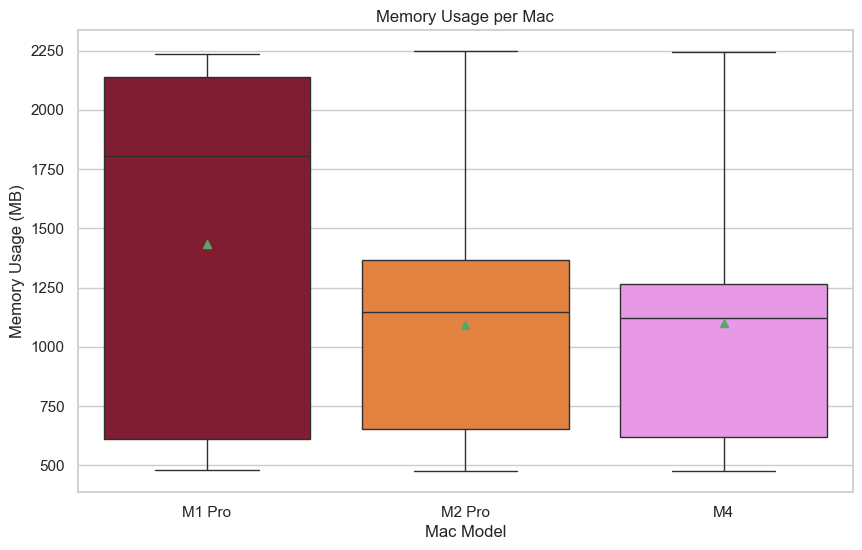

In [88]:
# memory usage
plt.figure(figsize=(10, 6))
df_training = df_all[df_all["test_type"] == "training"]
df_training_filtered = remove_outliers2(df_training, "memory_usage")
# supprimer au dessus de 2250
df_training_filtered = df_training_filtered[df_training_filtered["memory_usage"] < 2250]
df_training_filtered.dropna(subset=["mac_model", "memory_usage", "device"], inplace=True)
sns.boxplot(data=df_training_filtered, x="mac_model", y="memory_usage", palette=palette_colors, whis=4, showmeans=True)
plt.title("Memory Usage per Mac")
plt.xlabel("Mac Model")
plt.ylabel("Memory Usage (MB)")
plt.show()


In [89]:
import itertools

# Calcul de la consommation moyenne de mémoire par Mac
mean_memory_per_mac = df_training_filtered.groupby("mac_model")["memory_usage"].mean()

# Comparaison de chaque Mac avec tous les autres pour memory_usage
memory_comparison_results = []
for mac1, mac2 in itertools.combinations(mean_memory_per_mac.index, 2):
    mem1 = mean_memory_per_mac[mac1]
    mem2 = mean_memory_per_mac[mac2]
    
    if mem1 > mem2:
        ratio = mem1 / mem2
        memory_comparison_results.append(f"{mac1} consomme {ratio:.2f}x plus de mémoire que {mac2}")
    else:
        ratio = mem2 / mem1
        memory_comparison_results.append(f"{mac2} consomme {ratio:.2f}x plus de mémoire que {mac1}")

# Affichage des résultats
print("Moyenne de consommation mémoire par Mac:")
print(mean_memory_per_mac)

print("\nComparaison de la consommation mémoire entre chaque Mac:")
for result in memory_comparison_results:
    print(result)


Moyenne de consommation mémoire par Mac:
mac_model
M1 Pro    1435.745430
M2 Pro    1091.301403
M4        1102.163201
Name: memory_usage, dtype: float64

Comparaison de la consommation mémoire entre chaque Mac:
M1 Pro consomme 1.32x plus de mémoire que M2 Pro
M1 Pro consomme 1.30x plus de mémoire que M4
M4 consomme 1.01x plus de mémoire que M2 Pro


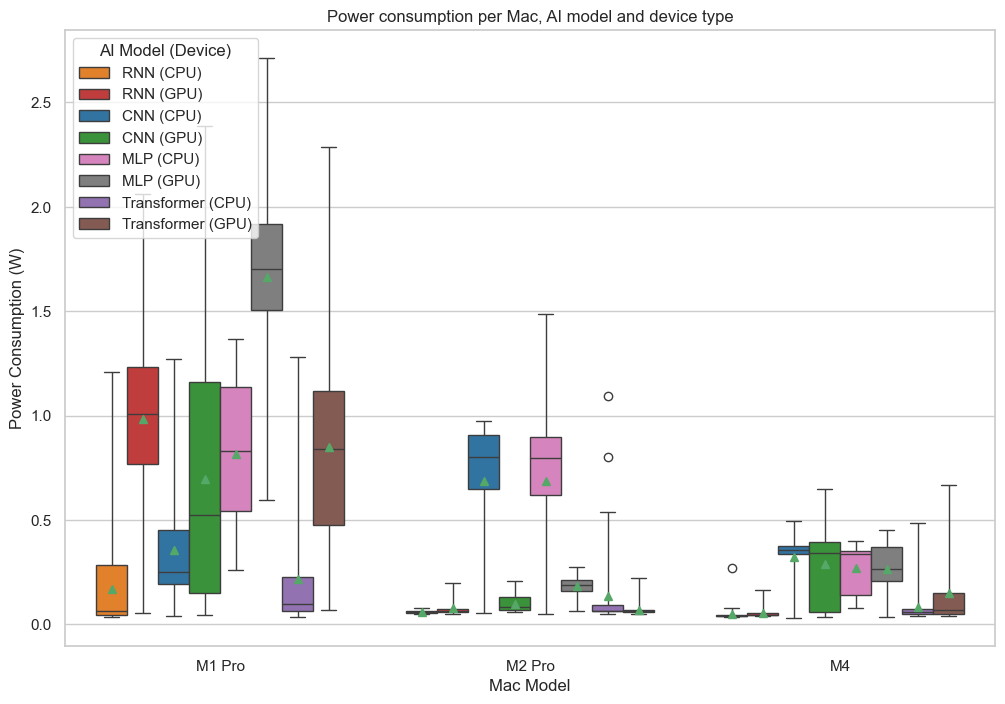

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du graphique
plt.figure(figsize=(12, 8))

# Filtrage des valeurs isolées avec votre fonction 'remove_outliers2'
df_training_filtered = remove_outliers2(df_training, "power_consumption")

# Création d'une nouvelle colonne combinant `ai_model` et `device` pour séparer CPU et GPU
df_training_filtered["ai_model_device"] = df_training_filtered["ai_model"] + " (" + df_training_filtered["device"] + ")"


# Définition d'un ordre personnalisé
custom_order = ["RNN (CPU)", "RNN (GPU)", 
                "CNN (CPU)", "CNN (GPU)", 
                "MLP (CPU)", "MLP (GPU)", 
                "Transformer (CPU)", "Transformer (GPU)"]

# Appliquer l'ordre défini
df_training_filtered["ai_model_device"] = pd.Categorical(df_training_filtered["ai_model_device"], categories=custom_order, ordered=True)

# Boxplot : séparation par modèle d'IA et distinction CPU/GPU avec dodge=True
sns.boxplot(data=df_training_filtered, 
            x="mac_model", 
            y="power_consumption", 
            hue="ai_model_device", 
            palette=palette_ai_device, 
            dodge=True, 
            whis=20,
            showmeans=True)

# Ajustement des axes et légende
plt.title("Power consumption per Mac, AI model and device type")
plt.xlabel("Mac Model")
plt.ylabel("Power Consumption (W)")
plt.legend(title="AI Model (Device)", loc="upper left")

# Affichage du graphique
plt.show()


In [91]:
import pandas as pd

# Calcul de la consommation moyenne par Mac
mean_power_per_mac = df_training_filtered.groupby("mac_model")["power_consumption"].mean()

# Trouver le Mac le plus économe (référence)
min_mac = mean_power_per_mac.idxmin()
min_value = mean_power_per_mac[min_mac]

# Calcul du rapport par rapport au Mac le plus économe
power_ratio = mean_power_per_mac / min_value

# Affichage des résultats
print("Moyenne de consommation énergétique par Mac:")
print(mean_power_per_mac)

print("\nRapport de supériorité de consommation énergétique :")
for mac, ratio in power_ratio.items():
    print(f"{mac} consomme {ratio:.2f}x plus que {min_mac}")


Moyenne de consommation énergétique par Mac:
mac_model
M1 Pro    0.699188
M2 Pro    0.255538
M4        0.186366
Name: power_consumption, dtype: float64

Rapport de supériorité de consommation énergétique :
M1 Pro consomme 3.75x plus que M4
M2 Pro consomme 1.37x plus que M4
M4 consomme 1.00x plus que M4


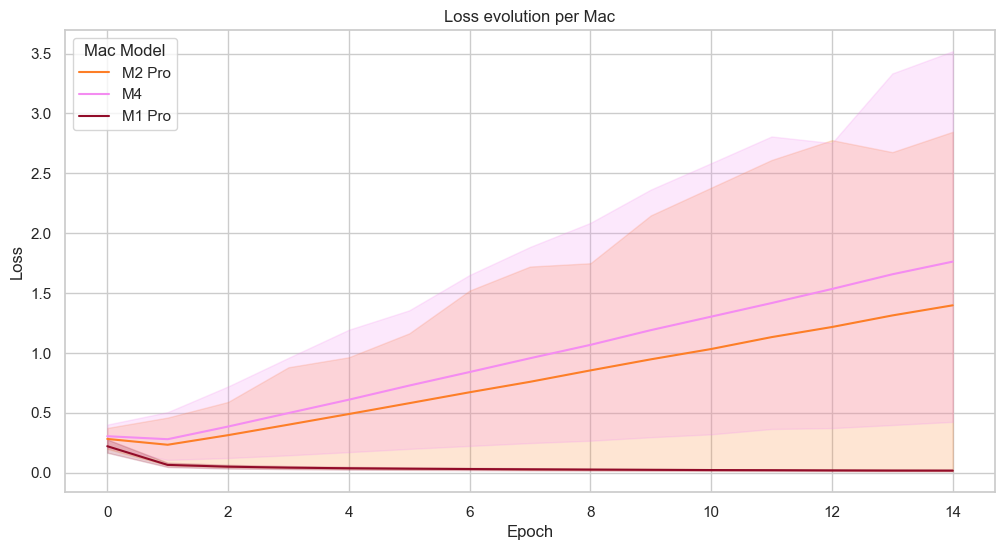

In [92]:
# Évolution de la loss en fonction des epochs pour l'entraînement
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_training, x="epoch", y="loss", hue="mac_model", palette=palette_colors)
plt.title("Loss evolution per Mac")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Mac Model")
plt.show()